Climate Change Belief Analysis 2022

In [ ]:
# Install Comet
!pip install comet_ml -q

In [ ]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key (saved as environment variable)
"""
Go ahead and get your api_key, project_name & workspace from your
Comet Project Folder.
"""
experiment = Experiment(
     api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
     project_name="team-12-advanced-classification-sentiment-analysis",
     workspace="jeniffermukami",)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/d2bb585a11484853bb326a3775b37dea
COMET INFO:   Metrics:
COMET INFO:     Accuracy : 0.7325266389741737
COMET INFO:     f1       : 0.6421862551054156
COMET INFO:     recall   : 0.609583622875278
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1JZ69erHaTLVOlmvrnssuskkimSbBc-I7
COMET INFO:   Parameters:
COMET INFO:     Bag of words                : count_Vectorizer
COMET INFO:     C                           : 1.0
COMET INFO:     algorithm                   : auto
COMET INFO:     alpha                       : 0.1
COMET INFO:     average                     : False
COMET INFO:     class_prior                 : 1
COMET INFO:     class

In [ ]:
#Import packages and dependecies

import pandas as pd
import numpy as np
import time, os

#Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

#Packages for preprocessing
import nltk
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

#Packages for trainig models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import tree
import xgboost as xgb

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load dataset
df_test = pd.read_csv('https://raw.githubusercontent.com/2110ACDS-T12/classification-predict-streamlit-template/falalu/Project%20File/test_with_no_labels.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/2110ACDS-T12/classification-predict-streamlit-template/falalu/Project%20File/train.csv')

In [ ]:
df_train.head(4)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736


In [ ]:
df_test.head(4)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263


In [ ]:
#info into language id
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


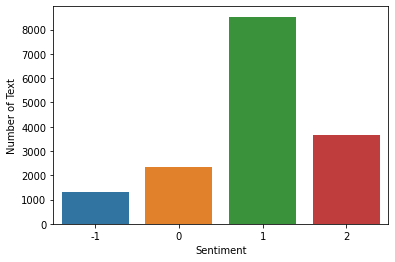

In [ ]:
sns.countplot(df_train.sentiment,)
plt.xlabel('Sentiment')
plt.ylabel('Number of Text')
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
stopword=nltk.corpus.stopwords.words('english')
stopword.remove('not')

extra_stopwords = ["The", "It", "it", "in", "In", "wh","rt"]

def processed_text(message):
  #Removing special characters
  #message=re.sub(r'@[\w]*','',message)
  #Removing urls from text
  #message=re.sub(r'http/S+','',message)
  #Removing Punctuations, Numbers, and Special Characters
  #message=re.sub(r'[^A-Za-z#]',' ',message)   
  #Removing stopword
  message = re.sub("https?:\/\/\S+", "", message)  # replacing url with domain name
  message = re.sub("#[A-Za-z0–9]+", " ", message)  # removing #mentions
  message = re.sub("#", " ", message)  # removing hash tag
  message = re.sub("\n", " ", message)  # removing \n
  message = re.sub("@[A-Za-z0–9]+", "", message)  # removing @mentions
  message = re.sub("RT", "", message)  # removing RT
  message = re.sub("^[a-zA-Z]{1,2}$", "", message)  # removing 1-2 char long words
  message = re.sub("\w*\d\w*", "", message)  

  for word in extra_stopwords:
        message = message.replace(word, "")
        
        message = message.lower()
    # will split and join the words
        message=' '.join(message.split())
  return message

In [ ]:
# Application of the function to clean the tweets
df_train['message'] = df_train['message'].apply(processed_text)
df_test['message'] = df_test['message'].apply(processed_text)

Feature Extraction


Split Dataset

In [ ]:
X = df_train['message']
y = df_train['sentiment']


Splitting of Training and Validation Sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35)

In [ ]:
df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn't thk carbon diox...,625221
1,1,'s not like we lack evidence of anthropogenic ...,126103
2,2,: researchers say we have three years to act o...,698562
3,1,wired : was a pivotal year the war on climate ...,573736
4,1,": 's , and a racist, sexist, climate change de...",466954


Model building

In [ ]:
classifiers = [LinearSVC(),
               LogisticRegression(random_state=42,
                                  multi_class='ovr',
                                  n_jobs=1,
                                  C=1e5,
                                  max_iter=4000),
               KNeighborsClassifier(n_neighbors=5),
               MultinomialNB(),
               ComplementNB(),
               SGDClassifier(loss='hinge',
                             penalty='l2',
                             alpha=1e-3,
                             random_state=42,
                             max_iter=5,
                             tol=None),
                                ]

In [ ]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    
    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

In [ ]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
LogisticRegression,0.638594,0.730359,0.717295,113.906960
LinearSVC,0.635822,0.734513,0.718364,1.363116
KNeighborsClassifier,0.545722,0.643670,0.637914,3.920267
ComplementNB,0.523629,0.695142,0.650300,0.830184
SGDClassifier,0.375781,0.625068,0.545474,0.978581
MultinomialNB,0.339957,0.616218,0.523962,0.828139



Hyperparameter Tuning on Most Performing Models

In [ ]:
# Creating a pipeline for the gridsearch with mnb classifier
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

tuned_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = tuned_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))

              precision    recall  f1-score   support

          -1       0.73      0.32      0.44       452
           0       0.61      0.33      0.43       831
           1       0.71      0.90      0.79      2988
           2       0.77      0.67      0.72      1266

    accuracy                           0.71      5537
   macro avg       0.70      0.55      0.59      5537
weighted avg       0.71      0.71      0.69      5537



In [ ]:
acc = accuracy_score(y_val, y_pred_mnb)
acc = round((acc*100),2)
print('Accuracy: ',acc,'%')

Accuracy:  71.19 %


In [ ]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

linearSVC = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('svm',LinearSVC())
                      ])
                      


"""
param_grid = {'SVC__C':np.arange(0.01,100,10)}
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)


# Retrain linear SVC using optimal hyperparameters:
lsvc_op = Pipeline([('tfidf', TfidfVectorizer(max_df=0.8,
                                                    min_df=2,
                                                    ngram_range=(1,2))),
                  ('clf', LinearSVC(C=0.3,
                                    class_weight='balanced',
                                    max_iter=3000))])


"""



linearSVC.fit(X_train, y_train)  # Fitting the model

y_pred_linearSVC = linearSVC.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_linearSVC))

              precision    recall  f1-score   support

          -1       0.71      0.42      0.53       452
           0       0.58      0.45      0.51       831
           1       0.75      0.87      0.81      2988
           2       0.75      0.70      0.73      1266

    accuracy                           0.73      5537
   macro avg       0.70      0.61      0.64      5537
weighted avg       0.72      0.73      0.72      5537



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print(confusion_matrix(y_val, y_pred_linearSVC))

[[ 189   72  167   24]
 [  29  373  373   56]
 [  31  149 2592  216]
 [  19   48  310  889]]


In [ ]:
acc = accuracy_score(y_val, y_pred_linearSVC)
acc = round((acc*100),2)
print('Accuracy: ',acc,'%')

Accuracy:  73.02 %


Saving the Model

In [ ]:
#import pickle
#filename = "trained_model.sav"
#pickle.dump(linearSVC, open(filename, "wb"))

In [ ]:
#loaded model
#loaded_model = pickle.load(open("/content/trained_model.sav", "rb"))

In [ ]:
#submission_df = pd.DataFrame(df_test['tweetid'])
#submission_df['sentiment'] = linearSVC.predict(df_test['message'])
#submission_df.to_csv('tweet_sentiment2.csv', index=False)

In [ ]:

#tweet_input = [input('enter a text: ')]
#prediction=loaded_model.predict(tweet_input)

#if prediction < 0:
 #   print("Negative")
#elif prediction == 0:
 #   print("Neutral")
#else:
 #   print("Positive")


In [ ]:
# Create dictionaries for the data we want to log
# This had to be defined since that applied to our model is the best from the grid search.
params ={"random_state": 45,
         "model_type ": "LinearSVC",
         "Bag of words": "count_Vectorizer",
         "scaler": "Standard Scaler",
         "min_df": 1,
         "max_df": 0.9,
         "n_grams": "(1, 2)"
        }

nb_metrics ={"Accuracy": metrics.accuracy_score(y_val, y_pred_linearSVC),
             "recall": metrics.recall_score(y_val, y_pred_linearSVC, average='macro'),
             "f1": metrics.f1_score(y_val, y_pred_linearSVC, average='macro'),
#              "Classification_Report": classification_report(y_val, y_pred)
            }

confusionmatrix = confusion_matrix(y_val, y_pred_linearSVC)

In [ ]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(nb_metrics)
experiment.log_notebook('5.0 Advance_Classification_Notebook.ipynb', overwrite=False)
experiment.log_confusion_matrix(labels=["News", "pro", "Neutral","Anti"], matrix=confusionmatrix)

COMET ERROR: We failed to read file 5.0 Advance_Classification_Notebook.ipynb for uploading.
Please double-check the file path and permissions


{'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=b34bf6e4e664425e9e091e56b1fd0f76&experimentKey=9f370e5bb1dc49cb9adb0f686d455428',
 'assetId': 'b34bf6e4e664425e9e091e56b1fd0f76',
 'web': 'https://www.comet.ml/api/asset/download?assetId=b34bf6e4e664425e9e091e56b1fd0f76&experimentKey=9f370e5bb1dc49cb9adb0f686d455428'}

In [ ]:
"""
# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_valid, y_pred, average='weighted')
precision = precision_score(y_valid, y_pred, average='weighted')
recall = recall_score(y_valid, y_pred, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.8,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '0'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()

"""